In [1]:
import sctt as st
import scanpy as sc
import matplotlib as mpl

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
adata = sc.read_h5ad('../data/toggle_switch/data_toggle.h5ad')
adata.obs['attractor']=adata.obs['leiden']

In [3]:
import scvelo as scv
scv.pp.moments(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [4]:
adata_aggr = st.dynamical_iteration(adata,n_states =2, n_iter = 10, n_neighbors = 100,return_aggr_obj=True, weight_connectivities = 0.2, n_components = 21)

  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

0.6929745215560479


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

0.5527318520722826


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

0.5503362205981279


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

0.3623180233696889


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

Trying to set attribute `.obs` of view, copying.


0.07797859705021515


In [5]:
import scvelo as scv
sc.tl.pca(adata_aggr, svd_solver='arpack')

In [6]:
adata_aggr.obs['rho_1']= adata.uns['da_out']['membership'][:,1]
adata_aggr.obs['attractor'] = adata.obs['attractor']
adata_aggr.obs['leiden'] = adata.obs['leiden']

In [8]:
sc.set_figure_params(dpi=600,fontsize = 18)
sc.pl.embedding(adata_aggr,color = ['leiden','attractor','speed','entropy'],basis = 'pca')

In [9]:
scv.tl.velocity_graph(adata_aggr)

computing velocity graph (using 1/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


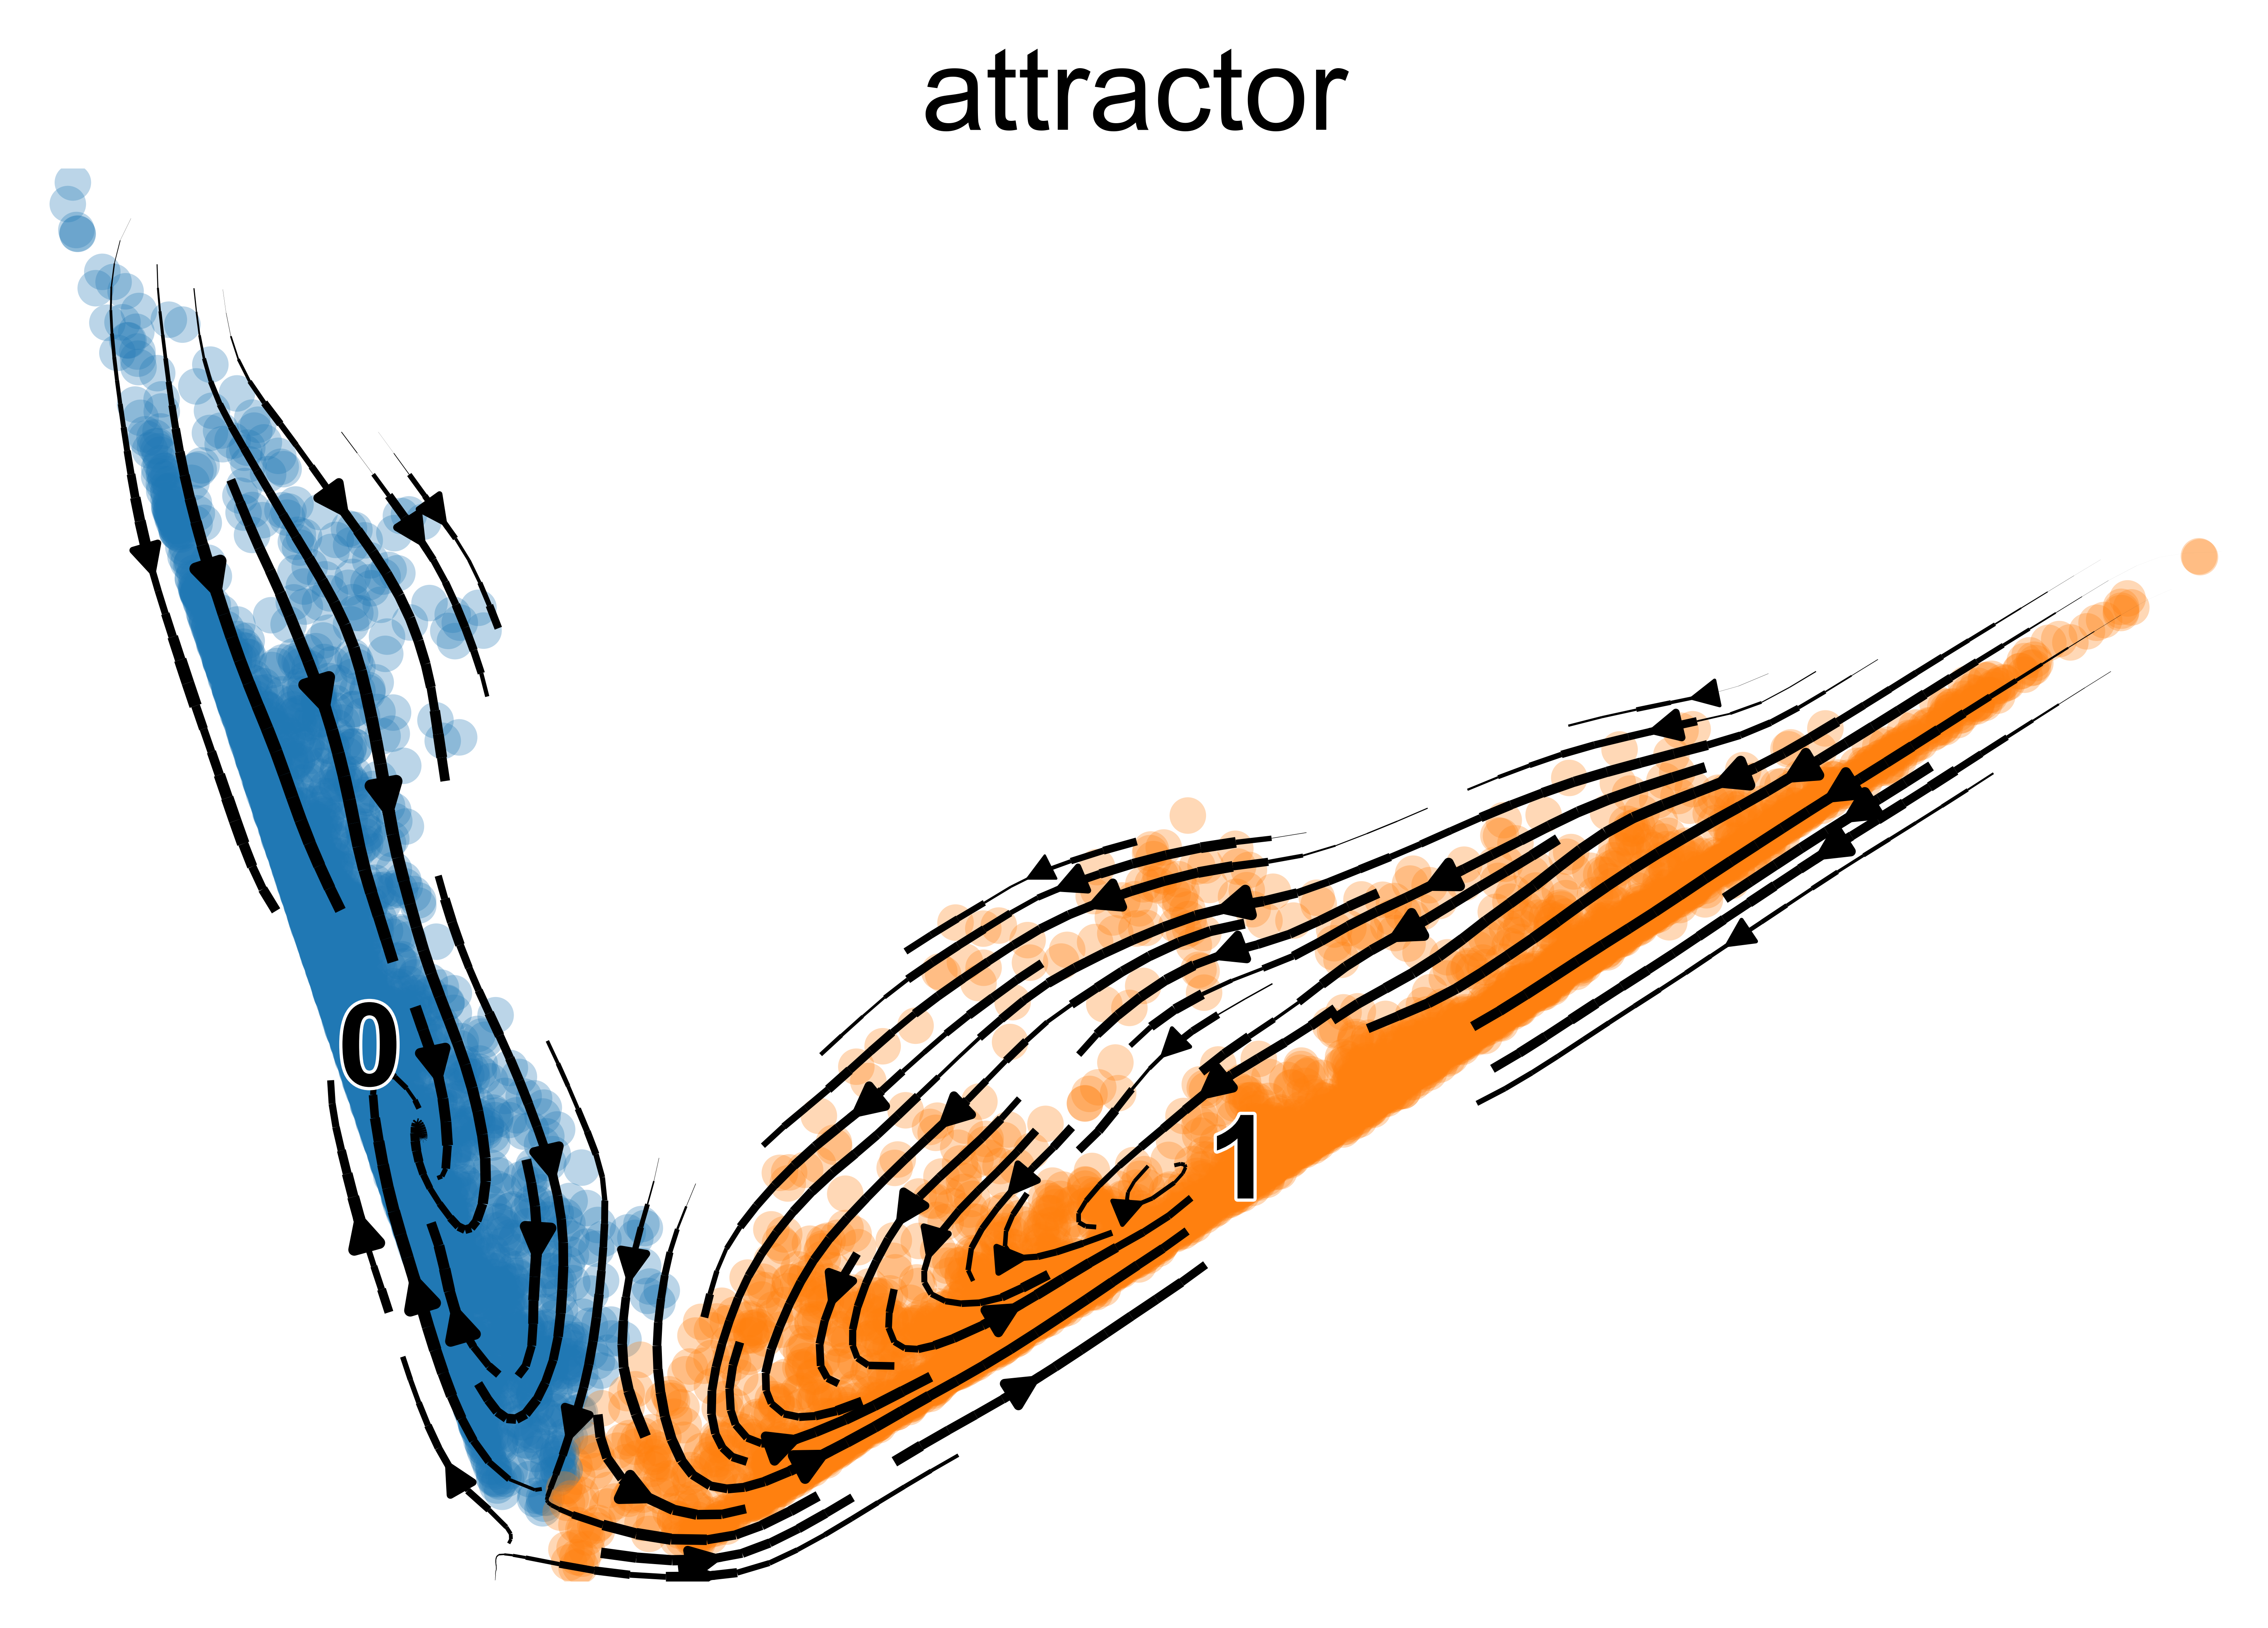

In [10]:
scv.set_figure_params(dpi =600,fontsize = 18)
scv.pl.velocity_embedding_stream(adata_aggr, basis='pca', color='attractor')

In [11]:
#import numpy as np
#np.save('../data/toggle_switch/toggle_pca.npy',adata_aggr.obsm['X_pca'])

check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:46) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:52) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:01:04) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:13) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:17) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:16) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:04) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:20) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:15) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  res = np.array(res) if as_array else res


    finished (0:00:18) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)


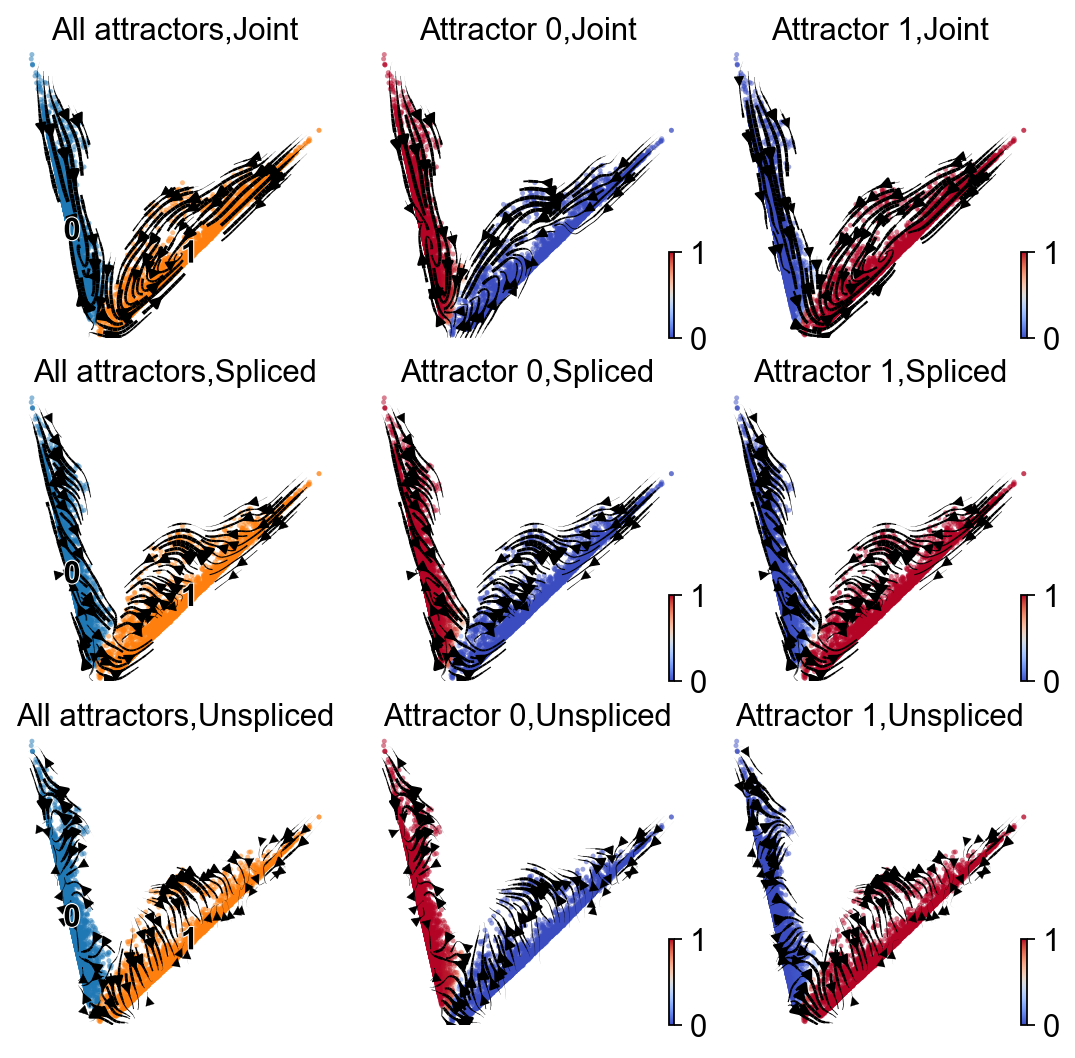

In [13]:
sc.set_figure_params(fontsize = 14)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
adata.obsm['X_pca_aggr']=adata_aggr.obsm['X_pca']
st.plot_tensor(adata, adata_aggr,  basis = 'pca')